### Music Song

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
music =  pd.read_csv('../data/raw/music_genre.csv')
music.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [11]:
music.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [12]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [13]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#
## Create a list of all independent variables except danceability
#independent_vars = ['popularity', 'acousticness', 'duration_ms', 'energy', 
#                    'instrumentalness', 'liveness', 'loudness', 'speechiness', 
#                    'valence']
#
## Set up the subplot grid
#fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
#fig.subplots_adjust(hspace=0.5, wspace=0.5)
#
## Flatten the axes array
#axes = axes.flatten()
#
## Iterate through each independent variable and create histograms
#for i, var in enumerate(independent_vars):
#    sns.histplot(data=music, x=var, ax=axes[i], kde=True)
#    axes[i].set_title(f'Histogram of {var}')
#
## Remove any unused subplots
#for j in range(len(independent_vars), len(axes)):
#    fig.delaxes(axes[j])
#
## Display the plot
#plt.tight_layout()
#plt.show()



### Target: danceability

In [14]:
print(music['danceability'].min())
print(music['danceability'].max())

0.0596
0.986


In [15]:

umbral_danceability = (music['danceability'].max() + music['danceability'].min()) / 2


music['danceability_category'] = music['danceability'].apply(lambda x: 'mucha' if x >= umbral_danceability else 'poca')

# Contar el número de canciones en cada categoría
conteo_categorias = music['danceability_category'].value_counts()

# Calcular la proporción de canciones en cada categoría
proporcion_mucha_danceability = conteo_categorias['mucha'] / len(music)
proporcion_poca_danceability = conteo_categorias['poca'] / len(music)

print("Proporción de canciones con mucha danceability:", proporcion_mucha_danceability)
print("Proporción de canciones con poca danceability:", proporcion_poca_danceability)



Proporción de canciones con mucha danceability: 0.6015998400159984
Proporción de canciones con poca danceability: 0.3984001599840016


### Codificación de la variable categórica: 0  1  2

In [16]:

music['danceability_category_encoded'] = music['danceability_category'].map({'poca': 0, 'mucha': 1})


music.head()


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,danceability_category,danceability_category_encoded
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic,mucha,1
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic,mucha,1
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic,mucha,1
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic,mucha,1
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic,mucha,1


### Ver la proporción de mi target

In [17]:
music['danceability_category'].value_counts(normalize=True)

danceability_category
mucha    0.6016
poca     0.3984
Name: proportion, dtype: float64

Text(0, 0.5, 'Porporcion')

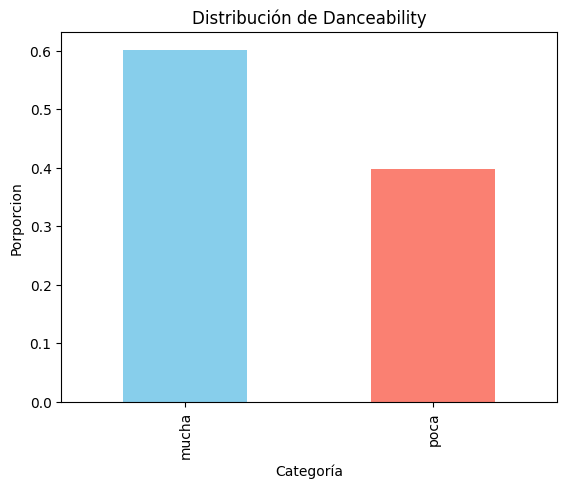

In [18]:
import matplotlib.pyplot as plt


proporcion = music['danceability_category'].value_counts(normalize=True)


proporcion.plot(kind='bar', color=['skyblue', 'salmon'])


plt.title('Distribución de Danceability')
plt.xlabel('Categoría')
plt.ylabel('Porporcion')


### Correlación general

<Axes: >

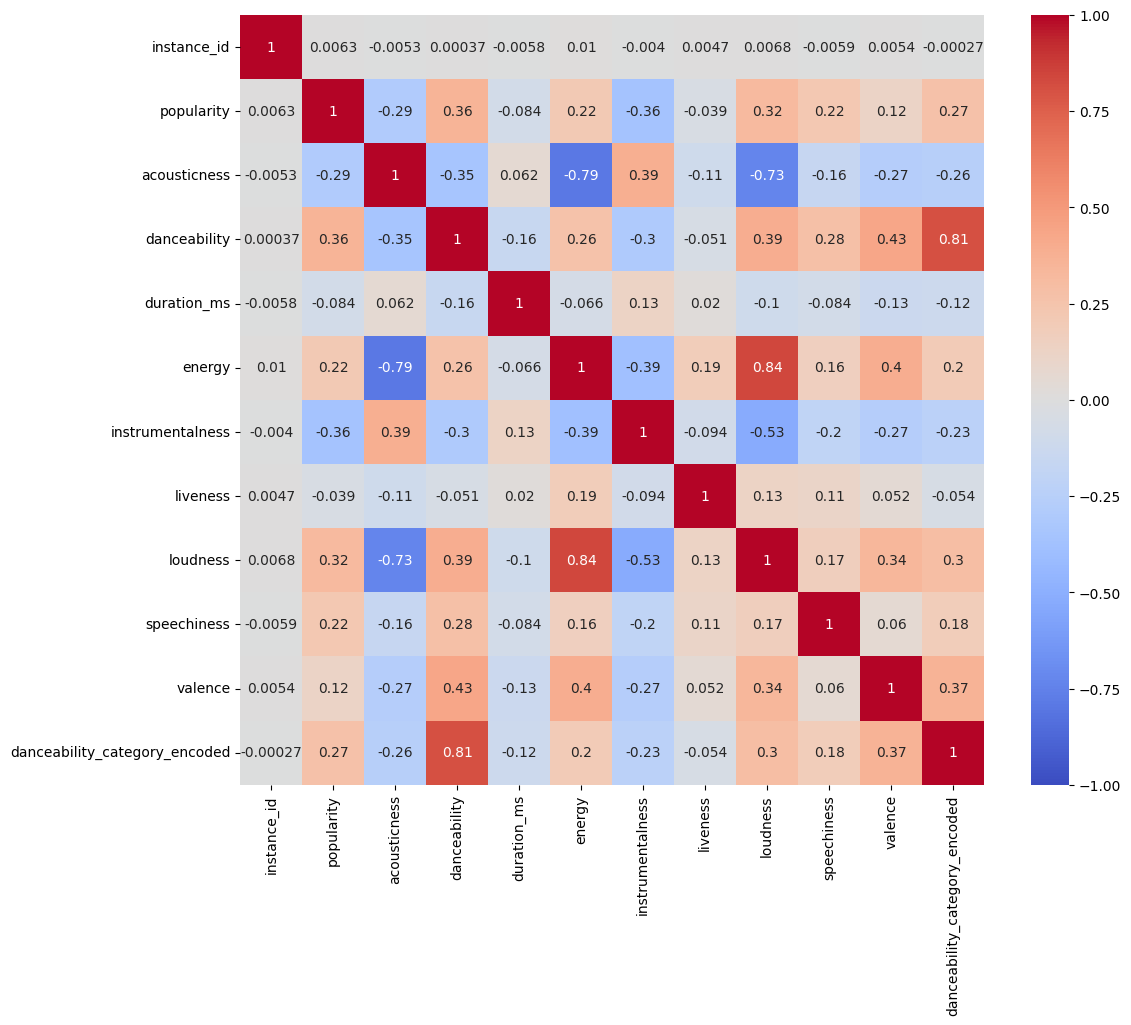

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(music.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

In [20]:
music.corr(numeric_only=True)

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,danceability_category_encoded
instance_id,1.000000,0.006317,-0.005268,0.000372,-0.005848,0.009952,-0.004015,0.004737,0.006847,-0.005908,0.005385,-0.000269
popularity,0.006317,1.000000,-0.290453,0.356420,-0.083809,0.216345,-0.364960,-0.039468,0.317941,0.224309,0.124913,0.272497
acousticness,-0.005268,-0.290453,1.000000,-0.347681,0.061862,-0.791250,0.387970,-0.109220,-0.730401,-0.163377,-0.270238,-0.256012
danceability,0.000372,0.356420,-0.347681,1.000000,-0.155507,0.263934,-0.301277,-0.051465,0.390859,0.279767,0.434557,0.805947
duration_ms,-0.005848,-0.083809,0.061862,-0.155507,1.000000,-0.066203,0.129738,0.019911,-0.102509,-0.083636,-0.130574,-0.123098
energy,0.009952,0.216345,-0.791250,0.263934,-0.066203,1.000000,-0.389730,0.186731,0.838399,0.158180,0.396317,0.202580
instrumentalness,-0.004015,-0.364960,0.387970,-0.301277,0.129738,-0.389730,1.000000,-0.093537,-0.529030,-0.199137,-0.272780,-0.228427
liveness,0.004737,-0.039468,-0.109220,-0.051465,0.019911,0.186731,-0.093537,1.000000,0.126504,0.114475,0.052110,-0.054021
loudness,0.006847,0.317941,-0.730401,0.390859,-0.102509,0.838399,-0.529030,0.126504,1.000000,0.165578,0.340664,0.296060
speechiness,-0.005908,0.224309,-0.163377,0.279767,-0.083636,0.158180,-0.199137,0.114475,0.165578,1.000000,0.059847,0.180813


In [21]:
music.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre',
       'danceability_category', 'danceability_category_encoded'],
      dtype='object')

### Vamos a intentar aumentar la correlacion de loudness con danceability

<Axes: xlabel='loudness', ylabel='Count'>

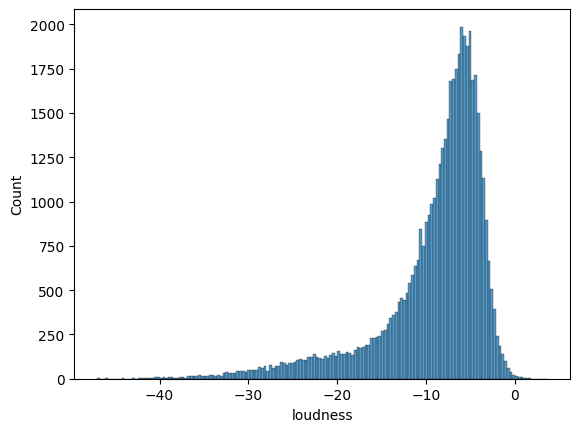

In [22]:
sns.histplot(music["loudness"])

In [23]:
print(music['loudness'].nunique())
print(music['loudness'].min())
print(music['loudness'].max())

17247
-47.04600000000001
3.744


In [24]:
rango1 = (-47.047, -15)
rango2 = (-15, -10)
rango3 = (-10, -5)
rango4 = (-5, 0)
rango5 = (0, 3.745)

In [25]:

rango1 = (-47.047, -15)
rango2 = (-15, -10)
rango3 = (-10, -5)
rango4 = (-5, 0)
rango5 = (0, 3.8)


def asignar_valor_numerico_loudness(loudness):
    if rango1[0] <= loudness < rango1[1]:
        return 0
    elif rango2[0] <= loudness < rango2[1]:
        return 1
    elif rango3[0] <= loudness < rango3[1]:
        return 5
    elif rango4[0] <= loudness < rango4[1]:
        return 4
    elif rango5[0] <= loudness <= rango5[1]:
        return 1
    else:
        return None  


music['loudness_category_numerica'] = music['loudness'].apply(asignar_valor_numerico_loudness)



In [26]:
music.groupby('loudness_category_numerica')['danceability'].mean().sort_values(ascending=True)

loudness_category_numerica
0.0    0.364489
4.0    0.562282
1.0    0.565475
5.0    0.607666
Name: danceability, dtype: float64

### Lo ordenamos segun la media 

In [27]:
music.loc[music['loudness_category_numerica'] == 0,"loudness_category_numerica2"]=0

music.loc[(music["loudness_category_numerica"] == 4) | (music["loudness_category_numerica"] == 1), "loudness_category_numerica2"] = 6
music.loc[music['loudness_category_numerica'] == 5,"loudness_category_numerica2"]=9

<Axes: >

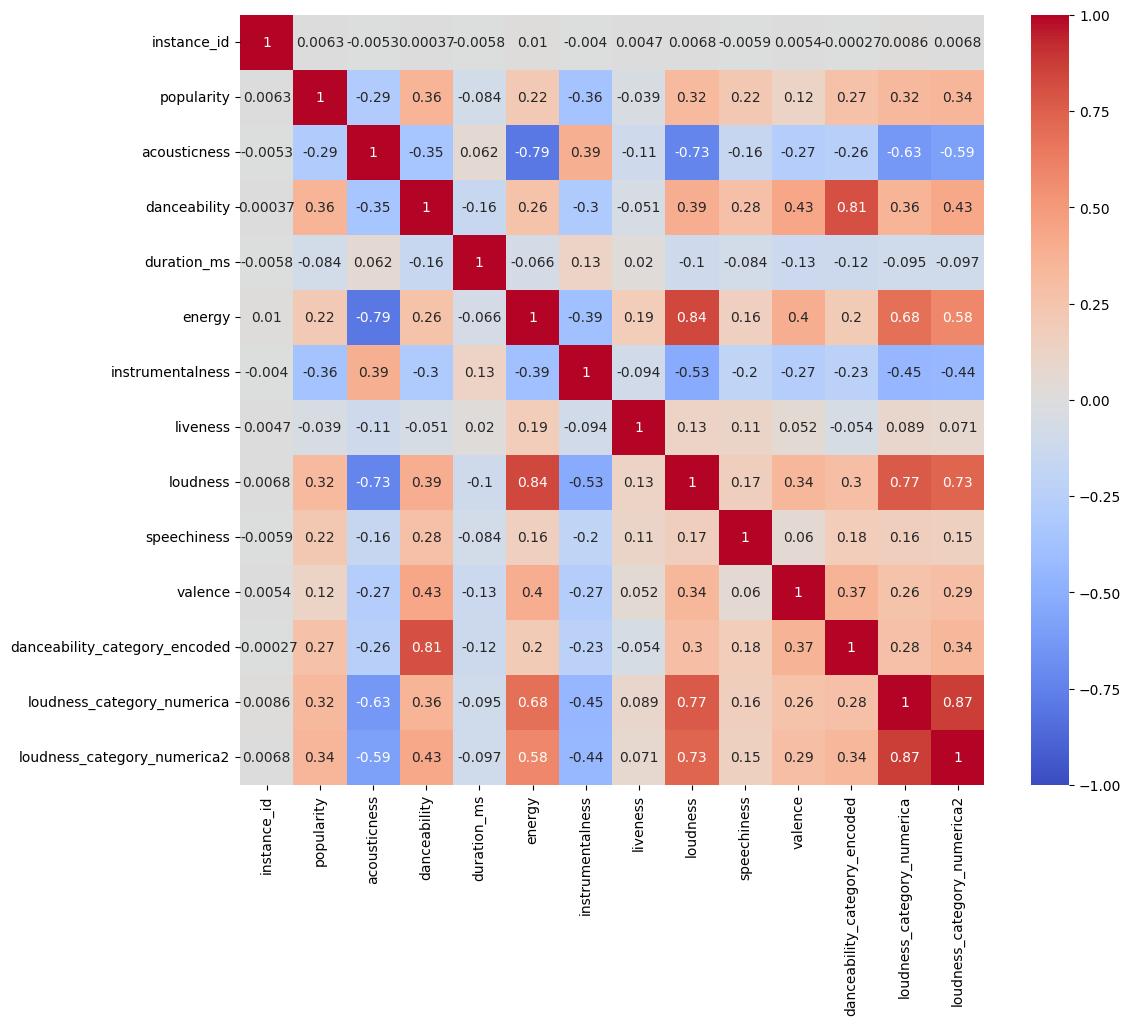

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(music.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

### Hemos conseguido pasar de un 0.39 a un 0.43

## Vamos a intentar subir la correlacion de valence respecto la danceability

<Axes: xlabel='valence', ylabel='Count'>

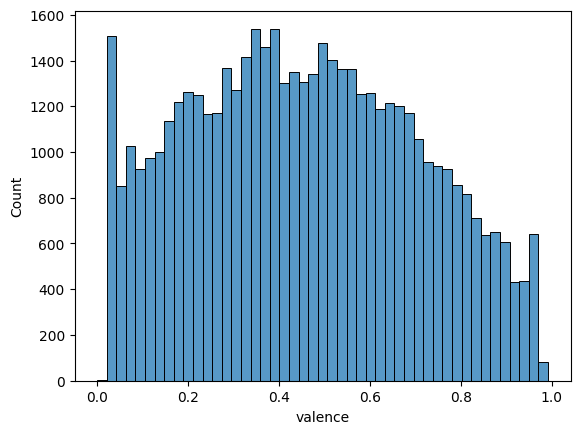

In [29]:
sns.histplot(music["valence"])

In [30]:
print(music["valence"].nunique())
print(music["valence"].min())
print(music["valence"].max())

1615
0.0
0.992


In [31]:
music.loc[music["valence"] < 0.2, "valence_cat_num"] = 0
music.loc[(music["valence"] >= 0.2) & (music["valence"] < 0.4), "valence_cat_num"] = 2
music.loc[(music["valence"] >= 0.4) & (music["valence"] < 0.6), "valence_cat_num"] = 4
music.loc[(music["valence"] >= 0.6) & (music["valence"] < 0.8), "valence_cat_num"] = 6
music.loc[(music["valence"] >= 0.8) & (music["valence"] < 0.994), "valence_cat_num"] = 8


In [32]:
music.groupby('valence_cat_num')['danceability'].mean().sort_values(ascending=True)

valence_cat_num
0.0    0.414076
2.0    0.540293
4.0    0.585983
6.0    0.623795
8.0    0.662899
Name: danceability, dtype: float64

<Axes: >

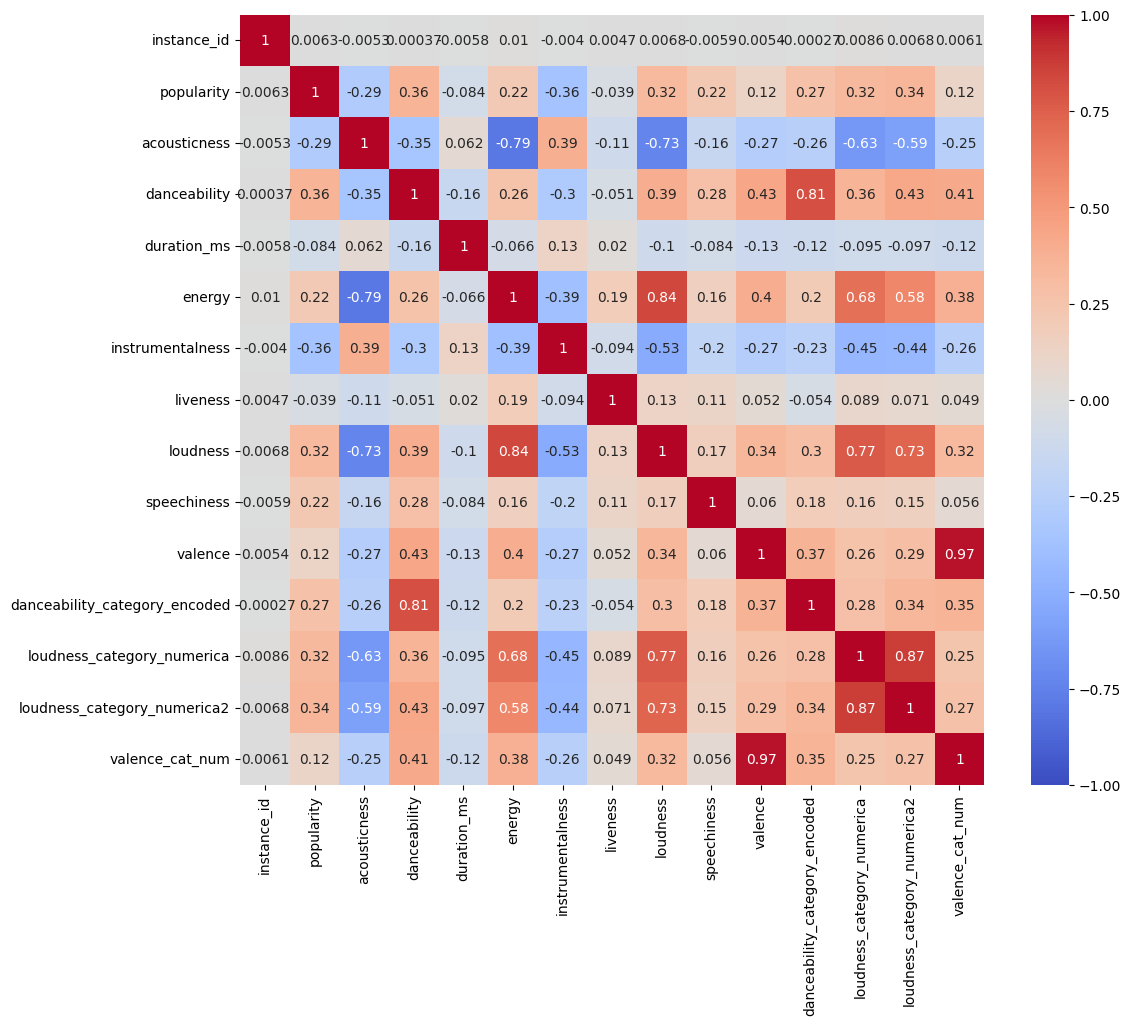

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(music.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

#### No se ha conseguido subir. No se usa la variable creada.

##  Vamos a intentar subir la correlacion de speechiness respecto la danceability

<Axes: xlabel='speechiness', ylabel='Count'>

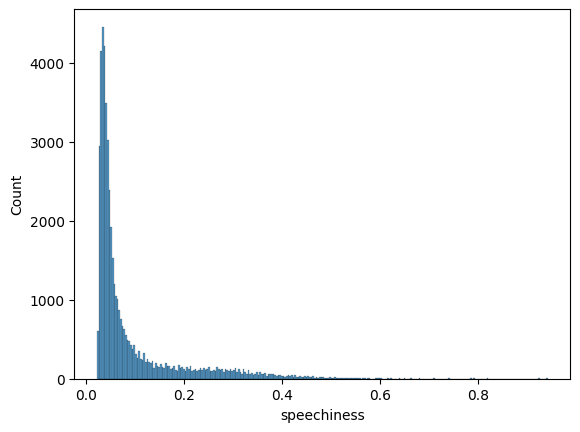

In [34]:
sns.histplot(music["speechiness"])

In [35]:
print(music["speechiness"].nunique())
print(music["speechiness"].min())
print(music["speechiness"].max())

1337
0.0223
0.942


In [36]:
#music.loc[music["speechiness"] < 0.2, "speech_cat_num"] = 0
#music.loc[(music["speechiness"] >= 0.2) & (music["speechiness"] < 0.4), "speech_cat_num"] = 1
#music.loc[(music["speechiness"] >= 0.4) & (music["speechiness"] < 0.6), "speech_cat_num"] = 2
#music.loc[(music["speechiness"] >= 0.6) & (music["speechiness"] < 0.8), "speech_cat_num"] = 3
#music.loc[(music["speechiness"] >= 0.8) & (music["speechiness"] < 0.942), "speech_cat_num"] = 4

In [37]:
#music.loc[music["speechiness"] < 0.1, "speech_cat_num"] = 0
#music.loc[(music["speechiness"] >= 0.1) & (music["speechiness"] < 0.2), "speech_cat_num"] = 1
#music.loc[(music["speechiness"] >= 0.2) & (music["speechiness"] < 0.3), "speech_cat_num"] = 2
#music.loc[(music["speechiness"] >= 0.3) & (music["speechiness"] < 0.4), "speech_cat_num"] = 3
#music.loc[(music["speechiness"] >= 0.4) & (music["speechiness"] < 0.5), "speech_cat_num"] = 4
#music.loc[(music["speechiness"] >= 0.5) & (music["speechiness"] < 0.6), "speech_cat_num"] = 5
#music.loc[(music["speechiness"] >= 0.6) & (music["speechiness"] < 0.7), "speech_cat_num"] = 6
#music.loc[(music["speechiness"] >= 0.7) & (music["speechiness"] < 0.8), "speech_cat_num"] = 7
#music.loc[(music["speechiness"] >= 0.8) & (music["speechiness"] < 0.9), "speech_cat_num"] = 8
#music.loc[(music["speechiness"] >= 0.9) & (music["speechiness"] < 0.945), "speech_cat_num"] = 9

In [38]:
# Categorizar la variable "speechiness" en intervalos de 0.05
music.loc[music["speechiness"] < 0.05, "speech_cat_num"] = 0
music.loc[(music["speechiness"] >= 0.05) & (music["speechiness"] < 0.1), "speech_cat_num"] = 1
music.loc[(music["speechiness"] >= 0.1) & (music["speechiness"] < 0.15), "speech_cat_num"] = 2
music.loc[(music["speechiness"] >= 0.15) & (music["speechiness"] < 0.2), "speech_cat_num"] = 3
music.loc[(music["speechiness"] >= 0.2) & (music["speechiness"] < 0.25), "speech_cat_num"] = 4
music.loc[(music["speechiness"] >= 0.25) & (music["speechiness"] < 0.3), "speech_cat_num"] = 5
music.loc[(music["speechiness"] >= 0.3) & (music["speechiness"] < 0.35), "speech_cat_num"] = 6
music.loc[(music["speechiness"] >= 0.35) & (music["speechiness"] < 0.4), "speech_cat_num"] = 7
music.loc[(music["speechiness"] >= 0.4) & (music["speechiness"] < 0.45), "speech_cat_num"] = 8
music.loc[(music["speechiness"] >= 0.45) & (music["speechiness"] < 0.5), "speech_cat_num"] = 9
music.loc[(music["speechiness"] >= 0.5) & (music["speechiness"] < 0.55), "speech_cat_num"] = 10
music.loc[(music["speechiness"] >= 0.55) & (music["speechiness"] < 0.6), "speech_cat_num"] = 11
music.loc[(music["speechiness"] >= 0.6) & (music["speechiness"] < 0.65), "speech_cat_num"] = 12
music.loc[(music["speechiness"] >= 0.65) & (music["speechiness"] < 0.7), "speech_cat_num"] = 13
music.loc[(music["speechiness"] >= 0.7) & (music["speechiness"] < 0.75), "speech_cat_num"] = 14
music.loc[(music["speechiness"] >= 0.75) & (music["speechiness"] < 0.8), "speech_cat_num"] = 15
music.loc[(music["speechiness"] >= 0.8) & (music["speechiness"] < 0.85), "speech_cat_num"] = 16
music.loc[(music["speechiness"] >= 0.85) & (music["speechiness"] < 0.9), "speech_cat_num"] = 17
music.loc[(music["speechiness"] >= 0.9) & (music["speechiness"] < 0.95), "speech_cat_num"] = 18


In [39]:
music.groupby('speech_cat_num')['danceability'].mean().sort_values(ascending=True)

speech_cat_num
0.0     0.512486
1.0     0.563644
17.0    0.580500
16.0    0.584167
2.0     0.597489
14.0    0.599565
10.0    0.642993
11.0    0.643981
15.0    0.644214
3.0     0.644529
9.0     0.655174
12.0    0.657219
8.0     0.661034
18.0    0.663917
7.0     0.667964
6.0     0.677543
4.0     0.679308
13.0    0.686875
5.0     0.689792
Name: danceability, dtype: float64

In [40]:
#music.loc[music['speech_cat_num'] == 0,"speech_cat_num2"]=0
#music.loc[music['speech_cat_num'] == 8,"speech_cat_num2"]=1
#music.loc[(music['speech_cat_num'] == 1) | (music['speech_cat_num'] == 7) ,"speech_cat_num2"]=2
#music.loc[music['speech_cat_num'] == 5,"speech_cat_num2"]=3
#music.loc[music['speech_cat_num'] == 4,"speech_cat_num2"]=4
#music.loc[(music['speech_cat_num'] == 9) | (music['speech_cat_num'] == 6) ,"speech_cat_num2"]=5
#music.loc[music['speech_cat_num'] == 3,"speech_cat_num2"]=6
#music.loc[music['speech_cat_num'] == 2,"speech_cat_num2"]=7

In [41]:
music.loc[music['speech_cat_num'] == 0,"speech_cat_num2"]=0
music.loc[music['speech_cat_num'] == 1,"speech_cat_num2"]=2
music.loc[(music['speech_cat_num'] == 17) | (music['speech_cat_num'] == 16) ,"speech_cat_num2"]=4
music.loc[(music['speech_cat_num'] == 2 )| (music['speech_cat_num'] == 14)  ,"speech_cat_num2"]=6
music.loc[(music['speech_cat_num'] == 10 )| (music['speech_cat_num'] == 11) | (music['speech_cat_num'] == 15) | (music['speech_cat_num'] == 3),"speech_cat_num2"]=8
music.loc[(music['speech_cat_num'] == 9) | (music['speech_cat_num'] == 12) ,"speech_cat_num2"]=10
music.loc[(music['speech_cat_num'] == 8) | (music['speech_cat_num'] == 18) ,"speech_cat_num2"]=12
music.loc[(music['speech_cat_num'] == 7 )| (music['speech_cat_num'] == 6) | (music['speech_cat_num'] == 4) ,"speech_cat_num2"]=14
music.loc[(music['speech_cat_num'] == 13) | (music['speech_cat_num'] == 5) ,"speech_cat_num2"]=16

<Axes: >

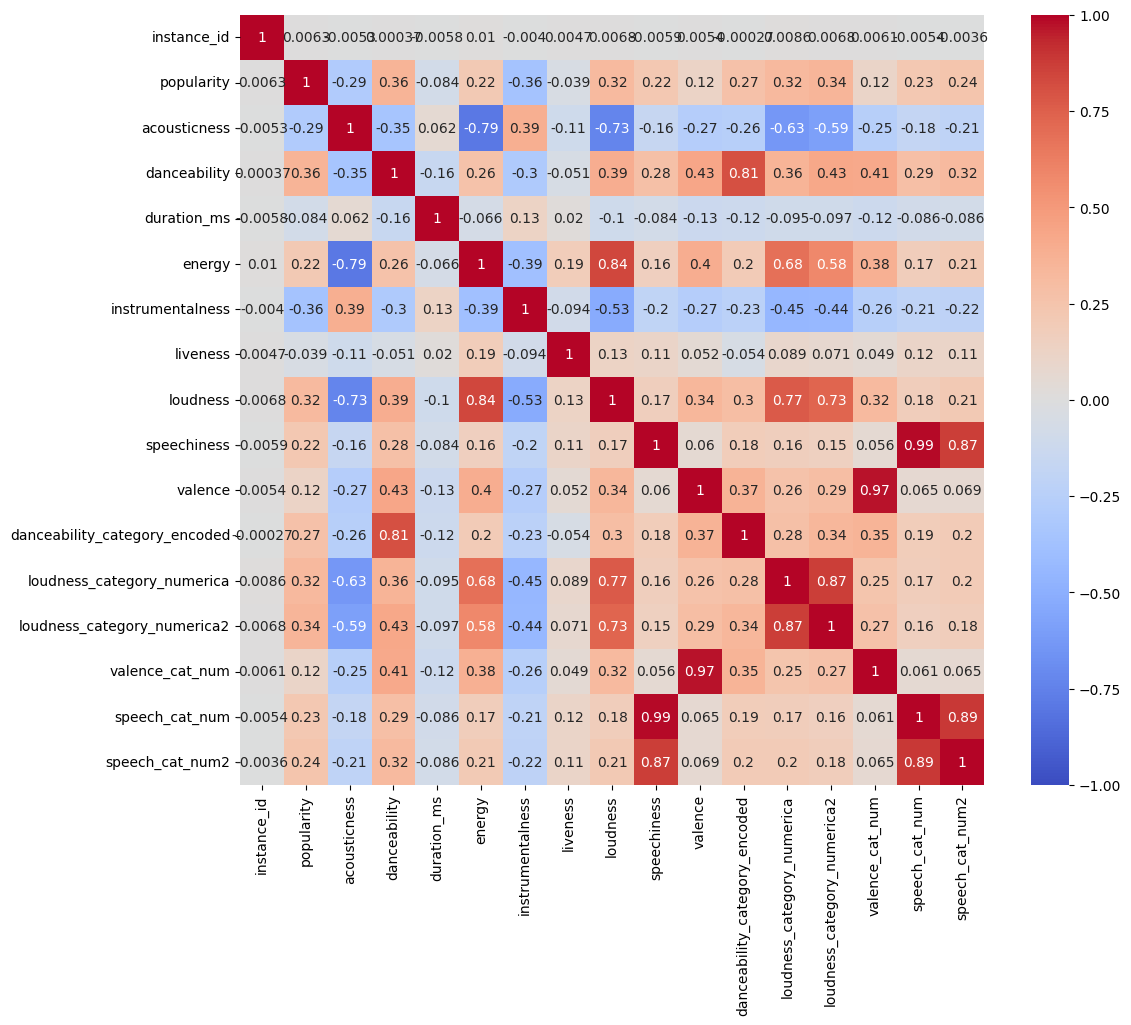

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(music.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

### De 0.28 a 0.32


##  Vamos a intentar subir la correlacion de energy respecto la danceability

<Axes: xlabel='energy', ylabel='Count'>

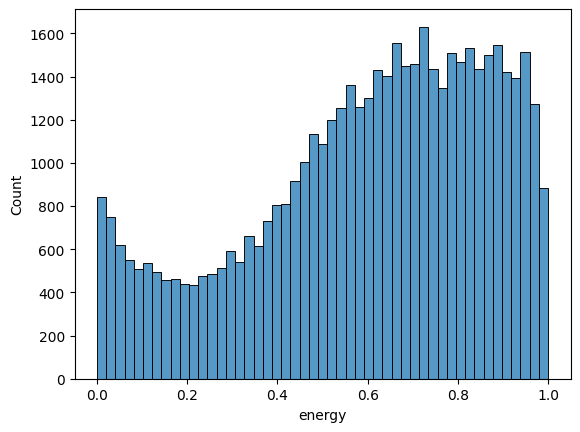

In [43]:
sns.histplot(music['energy'])

In [44]:
print(music['energy'].nunique())
print(music['energy'].min())
print(music['energy'].max())

2085
0.000792
0.999


In [45]:
music.loc[music["energy"] < 0.2, "energy_cat_num"] = 0
music.loc[(music["energy"] >= 0.2) & (music["energy"] < 0.4), "energy_cat_num"] = 1
music.loc[(music["energy"] >= 0.4) & (music["energy"] < 0.6), "energy_cat_num"] = 2
music.loc[(music["energy"] >= 0.6) & (music["energy"] < 0.8), "energy_cat_num"] = 3
music.loc[(music["energy"] >= 0.8) & (music["energy"] < 0.9999), "energy_cat_num"] = 4

In [46]:
music.groupby('energy_cat_num')['danceability'].mean().sort_values(ascending=True)

energy_cat_num
0.0    0.342035
1.0    0.526209
4.0    0.541898
3.0    0.620027
2.0    0.624010
Name: danceability, dtype: float64

In [47]:
music.loc[music['energy_cat_num'] == 0,"energy_cat_num2"]=0
music.loc[music['energy_cat_num'] == 1,"energy_cat_num2"]=2
music.loc[music['energy_cat_num'] == 4,"energy_cat_num2"]=4
music.loc[music['energy_cat_num'] == 3,"energy_cat_num2"]=6
music.loc[music['energy_cat_num'] == 2,"energy_cat_num2"]=7

<Axes: >

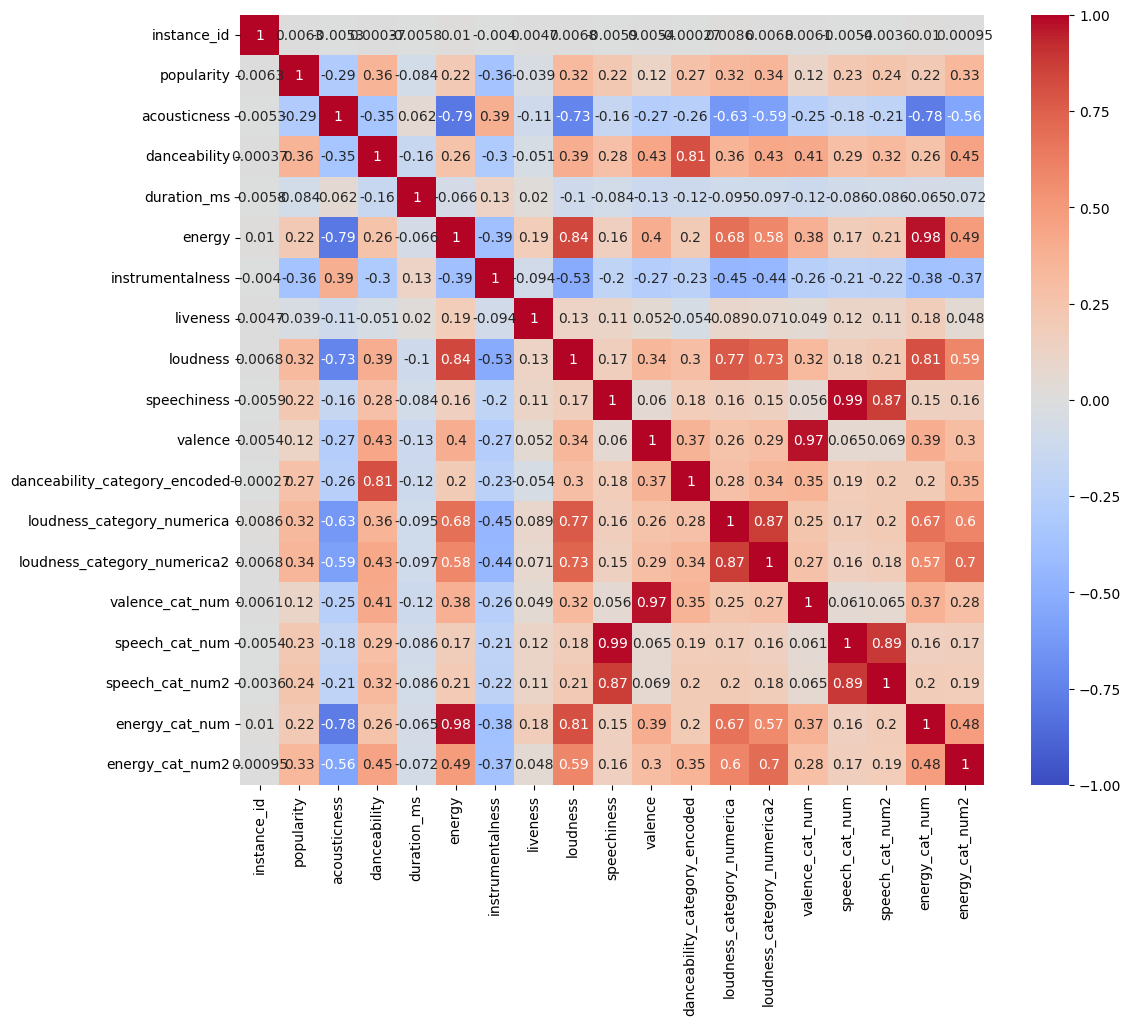

In [48]:
plt.figure(figsize=(12, 10))
sns.heatmap(music.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

#### Subida de 0.26 a 0.45

##  Vamos a intentar subir la correlacion de popularity respecto la danceability

<Axes: xlabel='popularity', ylabel='Count'>

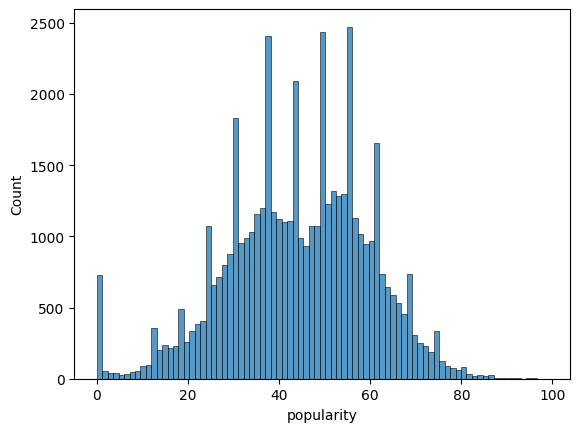

In [49]:
sns.histplot(music['popularity'])

In [50]:
music["popularity"]

0        27.0
1        31.0
2        28.0
3        34.0
4        32.0
         ... 
50000    59.0
50001    72.0
50002    51.0
50003    65.0
50004    67.0
Name: popularity, Length: 50005, dtype: float64

In [51]:
print(music['popularity'].nunique())
print(music['popularity'].min())
print(music['popularity'].max())

99
0.0
99.0


In [52]:
music.loc[music["popularity"] < 20.0, "popularity_cat_num"] = 0
music.loc[(music["popularity"] >= 20.0) & (music["popularity"] < 40.0), "popularity_cat_num"] = 1
music.loc[(music["popularity"] >= 40.0) & (music["popularity"] < 60.0), "popularity_cat_num"] = 2
music.loc[(music["popularity"] >= 60.0) & (music["popularity"] < 80.0), "popularity_cat_num"] = 3
music.loc[(music["popularity"] >= 80.0) & (music["popularity"] < 99.1), "popularity_cat_num"] = 4


In [53]:

popularity_danceability_mode = music.groupby('popularity_cat_num')['danceability'].apply(lambda x: x.mode().iloc[0])

popularity_danceability_mode_sorted = popularity_danceability_mode.sort_values(ascending=True)

popularity_danceability_mode_sorted


popularity_cat_num
0.0    0.376
3.0    0.505
1.0    0.554
2.0    0.610
4.0    0.734
Name: danceability, dtype: float64

In [54]:
music.loc[music['popularity_cat_num'] == 0,"popularity_cat_num2"]=0
music.loc[music['popularity_cat_num'] == 3,"popularity_cat_num2"]=2
music.loc[music['popularity_cat_num'] == 1,"popularity_cat_num2"]=4
music.loc[music['popularity_cat_num'] == 2,"popularity_cat_num2"]=6
music.loc[music['popularity_cat_num'] == 4,"popularity_cat_num2"]=8

<Axes: >

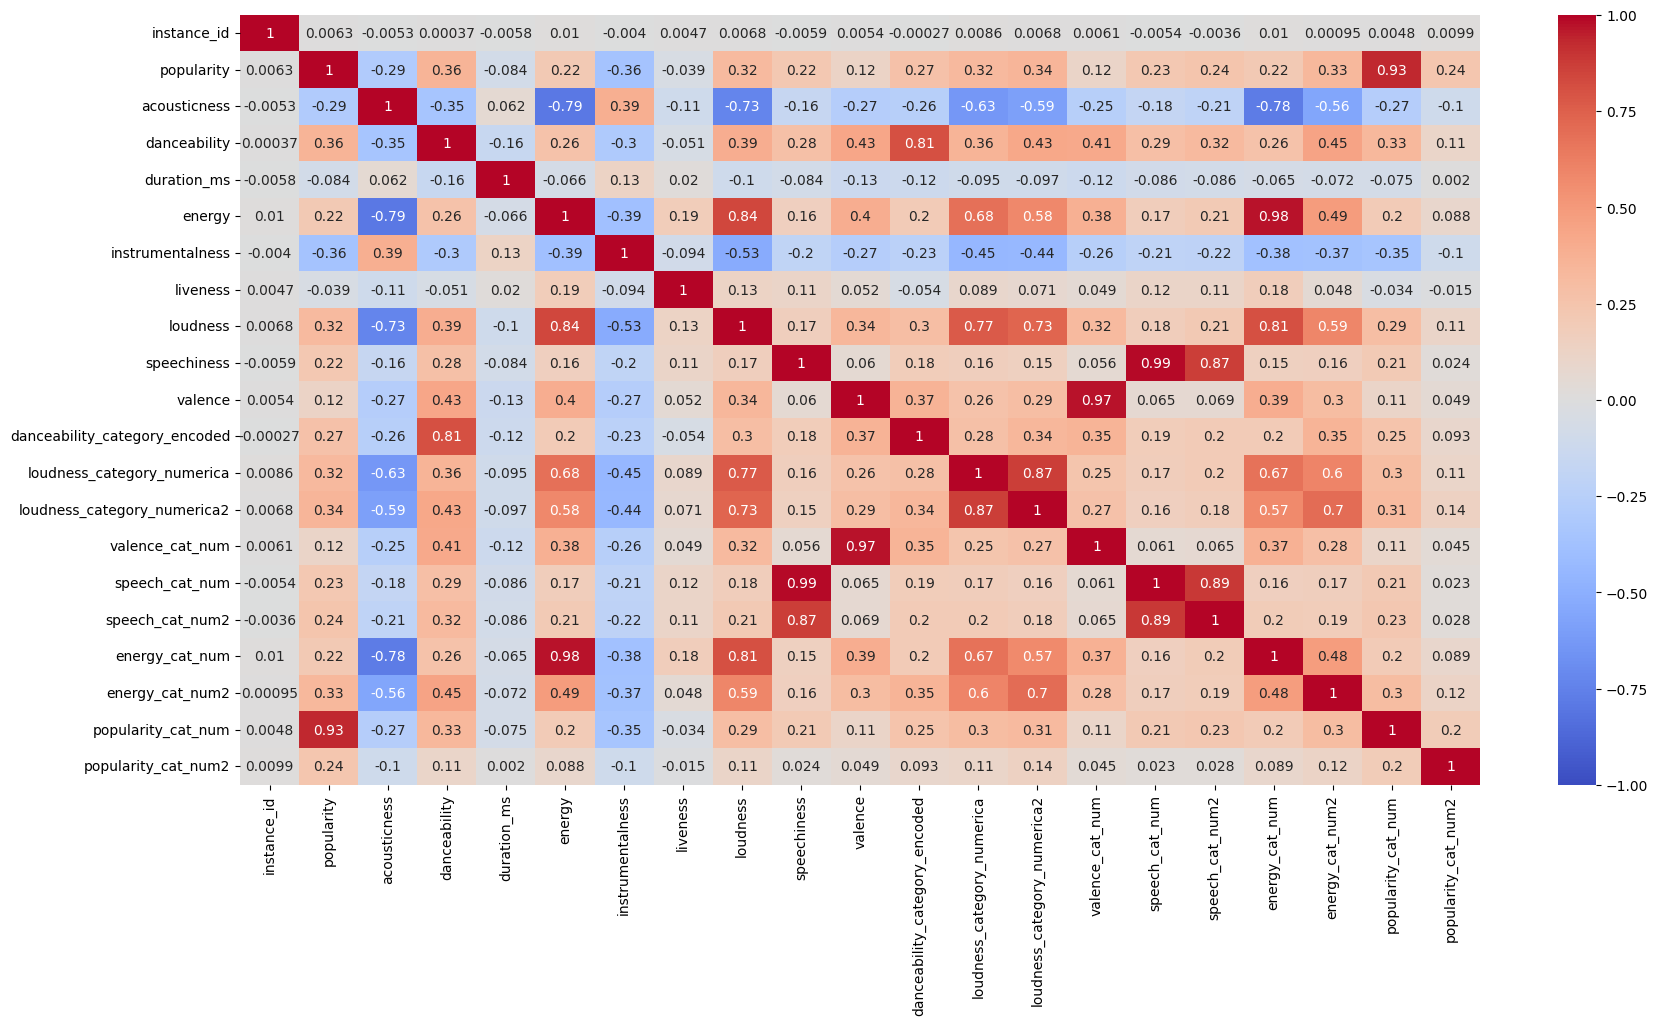

In [55]:
plt.figure(figsize=(20, 10))
sns.heatmap(music.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

#### No mejora, sino que empeora

In [56]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   instance_id                    50000 non-null  float64
 1   artist_name                    50000 non-null  object 
 2   track_name                     50000 non-null  object 
 3   popularity                     50000 non-null  float64
 4   acousticness                   50000 non-null  float64
 5   danceability                   50000 non-null  float64
 6   duration_ms                    50000 non-null  float64
 7   energy                         50000 non-null  float64
 8   instrumentalness               50000 non-null  float64
 9   key                            50000 non-null  object 
 10  liveness                       50000 non-null  float64
 11  loudness                       50000 non-null  float64
 12  mode                           50000 non-null 

In [57]:
music.dropna(subset=['instance_id'], inplace=True)


## Guardo mi dataset 

In [58]:
music.to_csv("../data/processed/music_final_class1.csv", index= False)

### Separo train y test

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
train_df, test_df = train_test_split(music, test_size=0.20, random_state=42 )

print(train_df.shape)
print(test_df.shape)

train_df.to_csv('../data/train/train1.csv', index= False)
test_df.to_csv('../data/test/test1.csv', index= False)

(40000, 29)
(10000, 29)
